In [ ]:
%matplotlib inline


# Basic Pizza Plot (Percentiles)

* Author: `slothfulwave612 <https://twitter.com/slothfulwave612>`_

* ``mplsoccer``, ``py_pizza`` module helps one to plot pizza charts in a few lines of code.

* The design idea is inspired by `Tom Worville <https://twitter.com/Worville>`_, `Football Slices <https://twitter.com/FootballSlices>`_ and `Soma Zero FC <https://twitter.com/somazerofc>`_

* We have re-written `Soumyajit Bose's <https://twitter.com/Soumyaj15209314>`_  pizza chart code to enable greater customisation.

Here we will show some examples of how to use ``mplsoccer`` to plot pizza-charts.


In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

## Load some fonts
We will use mplsoccer's FontManager to load some fonts from Google Fonts.
We borrowed the FontManager from the excellent
`ridge_map library <https://github.com/ColCarroll/ridge_map>`_.



In [2]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

## Load Image
Load a cropped image of Robert Lewandowski.



In [3]:
URL = "https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/lewa_cropped.png?raw=true"
lewa_cropped = Image.open(urlopen(URL))

## Plotting A Simple Pizza-Plot
To plot we need a parameter list and corresponding values list.



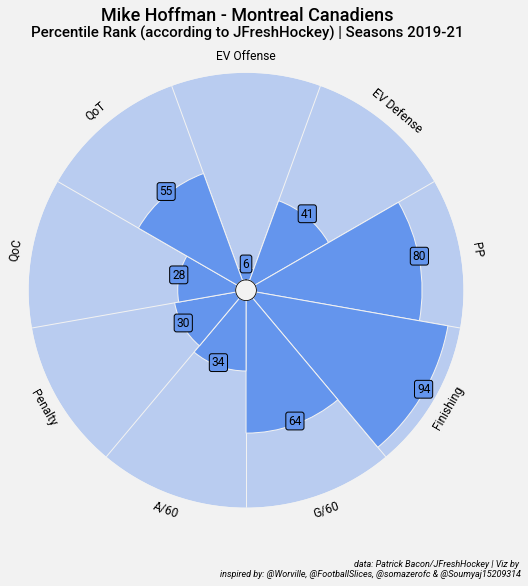

In [9]:
# parameter list
params = [
    "EV Offense", "EV Defense", "PP", "Finishing",
    "G/60", "A/60", "Penalty",
    "QoC", "QoT"
]

# values for corresponding parameters
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [6, 41, 80, 94, 64, 34, 30, 28, 55]


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#F2F2F2",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#F2F2F2",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Mike Hoffman - Montreal Canadiens", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank (according to JFreshHockey) | Seasons 2019-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: Patrick Bacon/JFreshHockey | Viz by "
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()


## Adding Image
One can add image to the pizza plot. The process is like this: first increase the size of the
center circle by using ``inner_circle_size`` argument inside ``PyPizza``
and then using ``add_image`` method to plot the image at the center.

Hack: You can use `Image-Online.co <https://crop-circle.imageonline.co/>`_
to crop a circle in image online and then use that image for plotting.



In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of params
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-.",           # linestyle for other circles
    inner_circle_size=20            # increase the circle size
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Robert Lewandowski - FC Bayern Munich", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add image
ax_image = add_image(
    lewa_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

## Adding Colors To Blank Spaces
One can even add colors to blank spaces, ``color_blank_space``
is used for specifying the colors. There are two options that users can use.
If ``color_blank_space="same"`` is passed then the slice-color with lower alpha
value will be used to color the blank space. If a list of color is passed to
``color_blank_space`` then those colors will be used. The user can set the alpha
for blank-space using ``blank_alpha`` argument.



In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#F2F2F2",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    figsize=(8, 8),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#F2F2F2",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Robert Lewandowski - FC Bayern Munich", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()

## Adding Colors To Blank Spaces (2)
Here we will pass a list of color to fill the blank spaces.



In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#F2F2F2",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                                      # list of values
    figsize=(8, 8),                              # adjust figsize according to your need
    color_blank_space=["#C5C5C5"]*len(params),   # use same color to fill blank space
    blank_alpha=0.4,                             # alpha for blank-space colors
    kwargs_slices=dict(
        facecolor="cornflowerblue", edgecolor="#F2F2F2",
        zorder=2, linewidth=1
    ),                                           # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, va="center"
    ),                                           # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                            # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Robert Lewandowski - FC Bayern Munich", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank vs Top-Five League Forwards | Season 2020-21",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

plt.show()